## Readme Data

Corridor data are trajectories of pedestrians in a closed corridor of lenght 30m and width 1.8m.
The trajectories are measured on a section of length 6m.
Experiments are carried out with N=15, 30, 60, 85, 95, 110, 140 and 230 participants.

Bottleneck data are trajectories of pedestrian in a bottleneck of lenght 8m and width 1.8m.
Experiments are carried out with 150 participants for bottleneck widths w=0.7, 0.95 1.2 and 1.8m.

See http://ped.fz-juelich.de/experiments/2009.05.12_Duesseldorf_Messe_Hermes/docu/VersuchsdokumentationHERMES.pdf page 20 and 28 for details. Column names of the file are: ID FRAME X Y Z. ID is the pedestrian ID. FRAME is the frame number (frame rate is 1/16s). X Y and Z pedestrian position in 3D. The data are part of the online database http://ped.fz-juelich.de/database.

Column names of the file are: ID FRAME X Y Z.
ID is the pedestrian ID.
FRAME is the frame number (frame rate is 1/16s).
X Y and Z pedestrian position in 3D.


In [1]:
# Enable these if automatic reloading of modules is wanted

# Load extension for automatic reload of modules
%load_ext autoreload
# Enable autoreload for all modules
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [3]:
c_60 = np.loadtxt("./Data/Corridor_Data/ug-180-060.txt")  # Load Corridor - N=60
print("ID", c_60[0][0])
print("FRAME", c_60[0][1])
print("X", c_60[0][2])
print("Y", c_60[0][3])
print("Z", c_60[0][4])
# Column names of the file are:
# ID FRAME X Y Z.
# ID is the pedestrian ID.
# FRAME is the frame number (frame rate is 1/16s).
# X Y and Z pedestrian position in 3D.
# The data are part of the online database

ID 1.0
FRAME 0.0
X 37.3859
Y 92.7146
Z 156.658


In [4]:
c_15 = np.loadtxt("./Data/Corridor_Data/ug-180-015.txt")

In [5]:
# c_15_ped_ids = np.unique(c_15[:,0])
# c_15_pedestrian_paths = np.empty((c_15_ped_ids.size, 3))
#
# for i in range(c_15_ped_ids.size):
#     ped_id = c_15_ped_ids[i]
#     ped_mask = (np.isclose(c_15[:,0], ped_id))
#     c_15_pedestrian_paths[i,:] = c_15[ped_mask, 2:5][i]

In [6]:
def get_ped_paths2(ped_data):
    ped_ids = np.unique(ped_data[:,0])
    print(ped_ids.shape)
    pedestrian_paths = [] #np.empty((c_15_ped_ids.size, 3))

    for i in range(ped_ids.size):
        ped_id = ped_ids[i]
        ped_mask = (np.isclose(ped_data[:,0], ped_id))
        pedestrian_paths.append(ped_data[ped_mask, 2:5])

    return pedestrian_paths

def plot_ped_paths2(ped_paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for ped_path in ped_paths:
        ax.plot(ped_path[0], ped_path[1], ped_path[2])

    plt.show()


def get_ped_paths(ped_data):
    ped_ids = np.unique(ped_data[:,0])
    print(ped_ids.shape)
    pedestrian_paths = [] #np.empty((c_15_ped_ids.size, 3))

    for i in range(ped_ids.size):
        ped_id = ped_ids[i]
        ped_mask = (np.isclose(ped_data[:,0], ped_id))
        pedestrian_paths.append(ped_data[ped_mask, :])

    return pedestrian_paths


def plot_ped_paths(ped_paths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for ped_path in ped_paths:
        ax.plot(ped_path[2], ped_path[3], ped_path[4])

    func_name = inspect.getframeinfo(inspect.currentframe()).function
    plt.title(func_name)

    plt.show()

In [7]:
c_15_pedestrian_paths = get_ped_paths(c_15)

(54,)


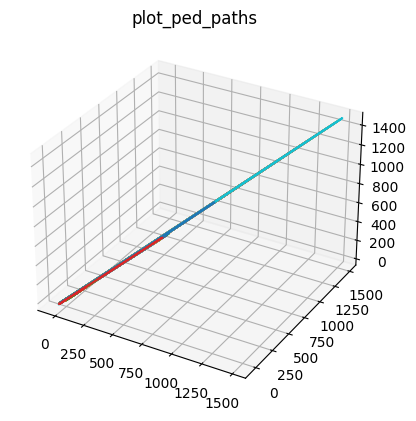

In [8]:
plot_ped_paths(c_15_pedestrian_paths)


### Test with Bottleneck Scenario


In [9]:
# Load Bottleneck Data with 150 Participants with Width=1.2m
b_120 = np.loadtxt("./Data/Bottleneck_Data/uo-180-120.txt")
#NOTE: Apparently there are 170 Pedestrians in here, not 150

In [10]:
b_120_ped_paths = get_ped_paths(b_120)

(170,)


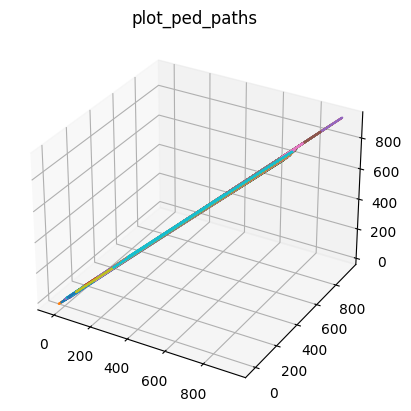

In [11]:
plot_ped_paths(b_120_ped_paths)

### Try out speed (in bottleneck, hopefully it is more interesting)

In [23]:
def get_ped_speed2(ped_data):
    # Convert coordinates to speed
    # New Format: ID, Frame, Speed
    ped_speed = np.empty((ped_data.shape[0], 3))

    # Doing it in a for-loop first, should probably change that later
    for i in range(ped_data.shape[0]):
        # Iterate through rows
        None


def get_ped_speed(ped_paths):
    # Convert coordinates to speed
    ped_speeds = []
        #np.empty((ped_data.shape[0], 3))

    # Doing it in a for-loop first, should probably change that later
    for ped_path in ped_paths:
        # New Format: ID, Frame, Speed
        ped_speed = np.empty((ped_path.shape[0]-1, 3))

        for i in range(ped_speed.shape[0]):
            # Iterate over rows of single pedestrian
            ped_speed[i][0:2] = ped_path[i][0:2]  # Copy PedID and FrameID
            ped_speed[i][2] = np.linalg.norm(ped_path[i+1][2:5] - ped_path[i][2:5]) / (ped_path[i+1][1] - ped_path[i][1])

        ped_speeds.append(ped_speed)

    return ped_speeds

def plot_ped_speeds(ped_speeds):
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)

    for ped_speed in ped_speeds:
        ax.plot(ped_speed[:,2])

    func_name = inspect.getframeinfo(inspect.currentframe()).function
    plt.title(func_name)

    plt.show()

def plot_ped_speeds_3d(ped_speeds):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for ped_speed in ped_speeds:
        ax.plot(ped_speed[:,2])

    func_name = inspect.getframeinfo(inspect.currentframe()).function
    plt.title(func_name)

    plt.show()

In [13]:
b_120_ped_speeds = get_ped_speed(b_120_ped_paths)

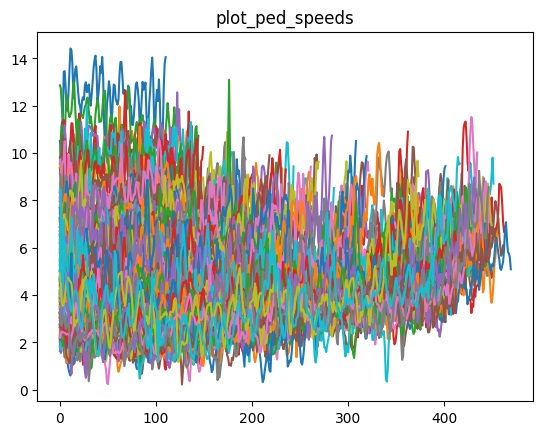

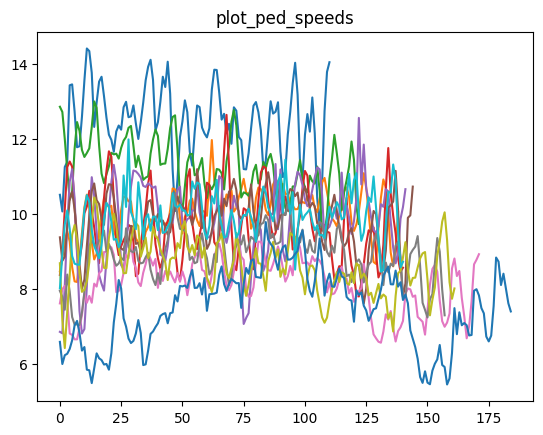

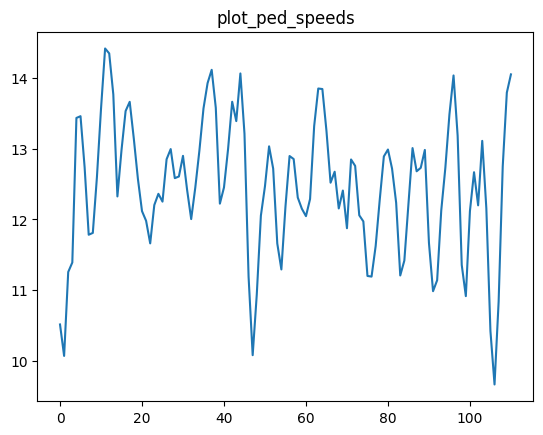

In [26]:
plot_ped_speeds(b_120_ped_speeds)
plot_ped_speeds(b_120_ped_speeds[:11])
plot_ped_speeds(b_120_ped_speeds[:1])